In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
import pymongo

In [2]:
def init_browser():
    # @NOTE: Replace the path with your actual path to the chromedriver
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    return Browser("chrome", **executable_path, headless=False)

def soup_url (url):
    browser = init_browser()
    # Visit url
    browser.visit(url)
    time.sleep(1)

    # Scrape page into Soup
    html = browser.html
    soup_url = bs(html, "html.parser")
    
     # Close the browser after scraping
    browser.quit()
    
    return soup_url

def soup_class (soup, class_name):
    
    # Soup data list
    soup_class = soup.find(class_= class_name)
    
    return soup_class 

def soup_class_list (soup, class_name):
   
    # Soup data list
    soup_class_list = soup.find_all(class_= class_name)
    
    return soup_class_list

def text_list (soup_class_list):
    text_list = []
    [text_list.append(record.text.replace("\n", "")) for record in soup_class_list]
    return text_list

In [3]:
# Visit mars.nasa.gov
mars_url = "https://oilprice.com"
url_news = "https://oilprice.com/Latest-Energy-News/World-News/"
soup = soup_url(url_news)

In [4]:
page_title = soup.title.text
page_title

'Oil News Today  | OilPrice.com'

In [25]:
# Collect the latest News Dates
date_news = text_list(soup_class_list(soup, "tableGrid"))
date_news[:5]

['Problems Are Piling Up For Oil MajorsOil majors have been hit…Australia’s Ambitious Energy Plans At Odds With Lower Carbon StrategyA drive to reduce emissions…Energy investors rave about this new investment resourceAnd it’s 100% FREE...',
 'NewsTurkey’s Black Sea Gas Discovery May Be Bigger Than ThoughtOct 09, 2020 at 13:29 | Tsvetana ParaskovaTurkey is about to revise up the estimate of its natural gas discovery in the Black Sea, Bloomberg reported on Friday, quoting sources with direct knowledge of the plans.…Norway’s Oil Strike Could End As Soon As FridayOct 09, 2020 at 13:11 | Tsvetana ParaskovaThere is a chance that the oil workers’ strike in Norway will end as soon as on Friday, the head of the trade union whose members are on strike for…Air Travel Collapse Makes Oil Hedges More ExpensiveOct 09, 2020 at 12:48 | Charles KennedyThe pandemic and the resulting plunge in air travel have caused airlines to largely abandon oil hedges against higher oil prices, thus making it more expe

In [24]:
# Collect the latest News Dates
date_news = text_list(soup_class_list(soup, "categoryArticle"))
date_news[:1]

['Turkey’s Black Sea Gas Discovery May Be Bigger Than ThoughtOct 09, 2020 at 13:29 | Tsvetana ParaskovaTurkey is about to revise up the estimate of its natural gas discovery in the Black Sea, Bloomberg reported on Friday, quoting sources with direct knowledge of the plans.…']

[<div class="categoryArticle">
 <a class="categoryArticle__imageHolder" href="https://oilprice.com/Latest-Energy-News/World-News/Norways-Oil-Strike-Could-End-As-Soon-As-Friday.html" style="background-image:url()"><img alt="Norway’s Oil Strike Could End As Soon As Friday" class="categoryArticle__image lozad opacity_0" data-error_image="https://d1o9e4un86hhpc.cloudfront.net/a/img/content/270x200-default.png" data-src="https://d32r1sh890xpii.cloudfront.net/news/270x200/2020-10-09_zsxvky4oan.jpg" height="200" width="270"/></a>
 <div class="categoryArticle__content">
 <a href="https://oilprice.com/Latest-Energy-News/World-News/Norways-Oil-Strike-Could-End-As-Soon-As-Friday.html"><h2 class="categoryArticle__title">Norway’s Oil Strike Could End As Soon As Friday</h2></a>
 <p class="categoryArticle__meta">Oct 09, 2020 at 13:11 | Tsvetana Paraskova</p>
 <p class="categoryArticle__excerpt">There is a chance that the oil workers’ strike in Norway will end as soon as on Friday, the head of the tra
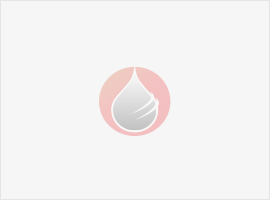
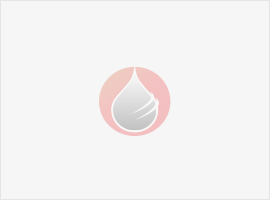
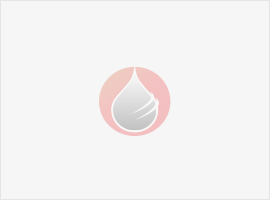
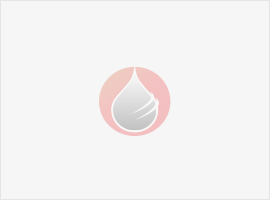
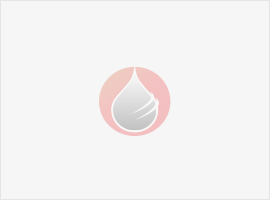

In [21]:
# Collect the latest News Titles
title_news = soup_class_list(soup, "categoryArticle")
title_news.pop(0)
title_news[:5]